In [97]:
    import os
    import pandas as pd
    import matplotlib.pyplot as plt

    # 데이터를 저장할 리스트
    all_articles = []

    # 데이터를 불러올 루트 디렉토리
    root_dir = "../../project_data/crawling_data"

    # 각 섹션 폴더에서 시간별 파일을 순회하면서 .pkl 파일 로드
    for section in os.listdir(root_dir):
        section_path = os.path.join(root_dir, section)
        
        if os.path.isdir(section_path):
            # 각 시간별 파일을 순회하면서 pkl 파일 로드
            for file in os.listdir(section_path):
                file_path = os.path.join(section_path, file)
                
                if file.endswith('.pkl'):
                    # 파일명에서 시간 정보 추출 (예: '_00.pkl' -> '00')
                    hour = file.split('_')[1].split('.')[0]
                    
                    # pkl 파일 읽기
                    try:
                        data = pd.read_pickle(file_path)
                        
                        # 각 기사를 저장, 섹션과 시간 정보 추가
                        for article in data:
                            title = article.get('title')
                            link = article.get('link')
                            content = article.get('content')
                            all_articles.append({
                                'section': section,
                                'hour': hour,
                                'title': title,
                                'link': link,
                                'content': content
                            })
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

    # 모든 기사를 하나의 데이터프레임으로 병합
    df_all_articles = pd.DataFrame(all_articles)


    # 데이터프레임 구조 확인
    print(df_all_articles.head())

  section hour                                    title  \
0     100   00    軍 "군통수권자 비난 용납 불가…우리 군사적 목표는 김정은"(종합)   
1     100   00      군 "북한에 경고…우리의 군사적 목표, 동포 아닌 오직 김정은"   
2     100   00  軍 "우리의 군사적 목표는 오직 김정은 한명…도발시 정권 종말"(종합)   
3     100   00        '경제통일' 제안 김동연 "김대중·노무현·문재인 꿈 잇겠다"   
4     100   00          합참 "우리의 군사적 목표는 오직 김정은 한 명"(종합)   

                                                link  \
0  https://n.news.naver.com/mnews/article/003/001...   
1  https://n.news.naver.com/mnews/article/008/000...   
2  https://n.news.naver.com/mnews/article/421/000...   
3  https://n.news.naver.com/mnews/article/047/000...   
4  https://n.news.naver.com/mnews/article/001/001...   

                                             content  
0  국방부·합참 잇단 입장문 발표…"핵 도발 즉시 北정권 종말" 경고\n\n\n\n\n...  
1  [the300] 軍, 북한 김정은 "尹, 온전치 못한 사람" 막말에 엄중 경고\n\...  
2  김정은·김여정의 국군통수권자 비난에 합참·국방부 잇달아 경고장\n\n\n\n\n\n...  
3  '10.4 남북정상선언 17주년 기념식' 환영사 통해 역설... "윤석열 '궤도이탈...  
4  국방부 "김정은 초조·불안의 발로…국군통수권자 비난 용

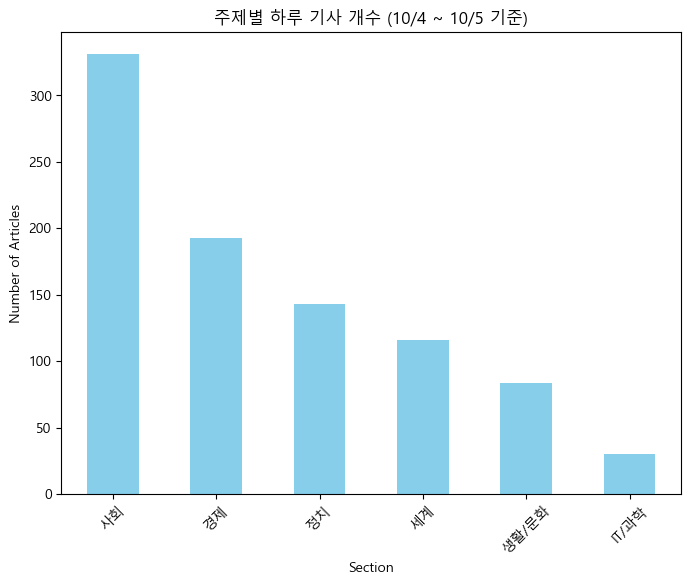

In [98]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()


# 섹션 번호와 이름을 매핑하는 딕셔너리 생성
section_labels = {
    '100': '정치',
    '101': '경제',
    '102': '사회',
    '103': '생활/문화',
    '104': '세계',
    '105': 'IT/과학'
}



# 섹션 번호를 섹션 이름으로 변환하여 그래프에 적용
plt.figure(figsize=(8, 6))
plt.rc('font', family=font_name)
df_all_articles['section'].map(section_labels).value_counts().plot(kind='bar', color='skyblue')
plt.title('주제별 하루 기사 개수 (10/4 ~ 10/5 기준)')
plt.xlabel('Section')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)

plt.show()

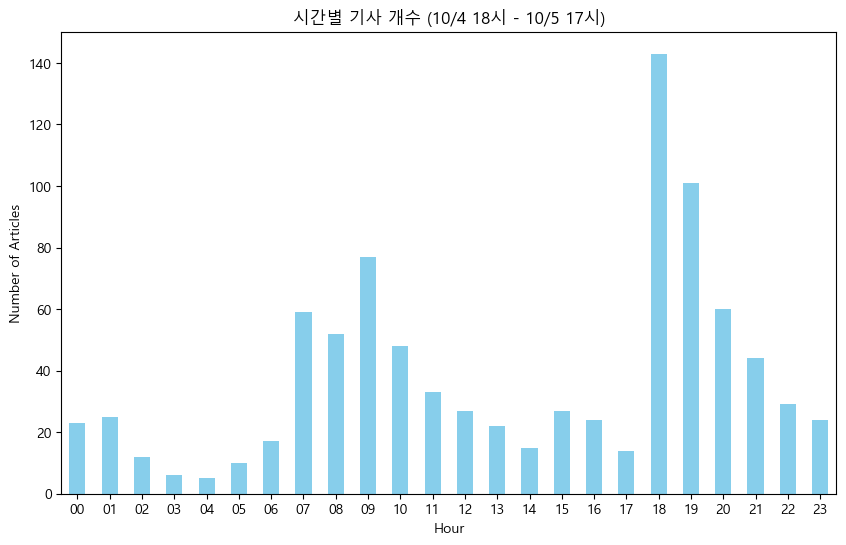

In [99]:
# 시간별 기사 수 집계
hourly_counts = df_all_articles['hour'].value_counts().sort_index()

# 시간별 기사 수 시각화
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('시간별 기사 개수 (10/4 18시 - 10/5 17시)')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x800 with 0 Axes>

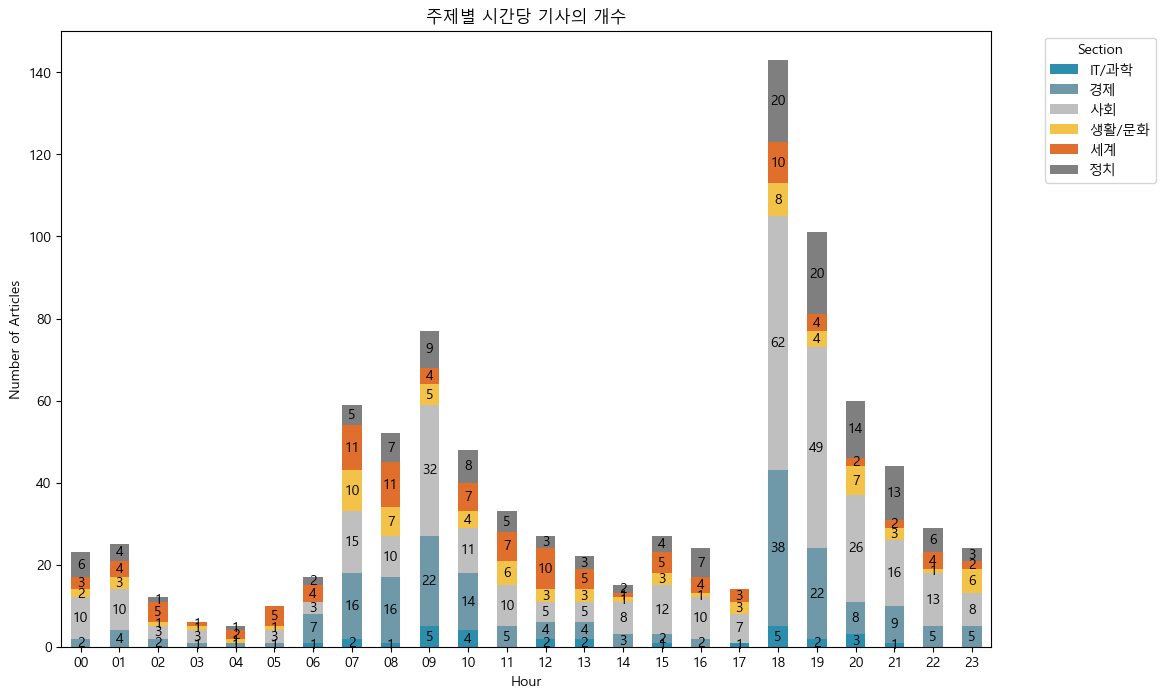

In [100]:
import matplotlib.pyplot as plt

# 사용할 색상 리스트 (추천 색상 조합 1)
colors = ['#2B8EAD', '#6F98A8', '#BFBFBF', '#F2C249', '#E06F2D', '#7F7F7F']

# 섹션 번호와 이름을 매핑하는 딕셔너리 생성
section_labels = {
    '100': '정치',
    '101': '경제',
    '102': '사회',
    '103': '생활/문화',
    '104': '세계',
    '105': 'IT/과학'
}

# 섹션 번호를 섹션 이름으로 변환
df_all_articles['section'] = df_all_articles['section'].map(section_labels)

# 각 섹션별 시간별 기사 수 집계
section_hourly_counts = df_all_articles.groupby(['section', 'hour']).size().unstack(fill_value=0)

# 시각화 (직접 지정한 색상 사용)
plt.figure(figsize=(12, 8))
ax = section_hourly_counts.T.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

# 각 바에 기사 개수 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # 기사가 존재하는 경우에만 표시
        x, y = p.get_xy() 
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

plt.title('주제별 시간당 기사의 개수')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [103]:
# 저녁과 아침 시간대를 정의
evening_hours = ['20', '21', '22', '23']
morning_hours = ['00', '01', '02', '03', '04', '05', '06']

# 저녁과 아침 시간대 기사 필터링
evening_articles = df_all_articles[df_all_articles['hour'].isin(evening_hours)]
morning_articles = df_all_articles[df_all_articles['hour'].isin(morning_hours)]

# 저녁과 아침 시간대의 총 기사 수 계산
evening_morning_articles_count = len(evening_articles) + len(morning_articles)

# 전체 기사 수
total_articles_count = len(df_all_articles)

# 퍼센트 계산
percentage_evening_morning = (evening_morning_articles_count / total_articles_count) * 100

# 결과 출력
print(f"전날 저녁부터 다음날 아침까지 발생한 기사 비율: {percentage_evening_morning:.2f}%")


전날 저녁부터 다음날 아침까지 발생한 기사 비율: 28.43%


# 토픽의 흐름

In [119]:
data_file_path = './select_topic.csv'

df = pd.read_csv(data_file_path)

print(df.head(5))

   brief_id                  created_at                  updated_at  user_id  \
0         1  2024-10-08 00:00:00.000000  2024-10-07 15:27:08.324000        1   
1         1  2024-10-08 00:00:00.000000  2024-10-07 15:27:08.324000        1   
2         1  2024-10-08 00:00:00.000000  2024-10-07 15:27:08.324000        1   
3         1  2024-10-08 00:00:00.000000  2024-10-07 15:27:08.324000        1   
4         1  2024-10-08 00:00:00.000000  2024-10-07 15:27:08.324000        1   

                          content_file_path  \
0  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
1  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
2  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
3  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
4  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   

                          summary_file_path  \
0  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
1  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
2  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
3  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
4

In [120]:
df.columns

Index(['brief_id', 'created_at', 'updated_at', 'user_id', 'content_file_path',
       'summary_file_path', 'content', 'summary', 'brief_id.1', 'created_at.1',
       'topic_id', 'topic_model_id', 'updated_at.1', 'weight', 'created_at.2',
       'topic_model_id.1', 'topic_model_word_id', 'updated_at.2', 'word_id',
       'created_at.3', 'updated_at.3', 'word_id.1', 'word'],
      dtype='object')

In [121]:
import seaborn as sns

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\2761795685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words['created_at.2'] = pd.to_datetime(df_words['created_at.2'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\2761795685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words['hour'] = df_words['created_at.2'].dt.hour


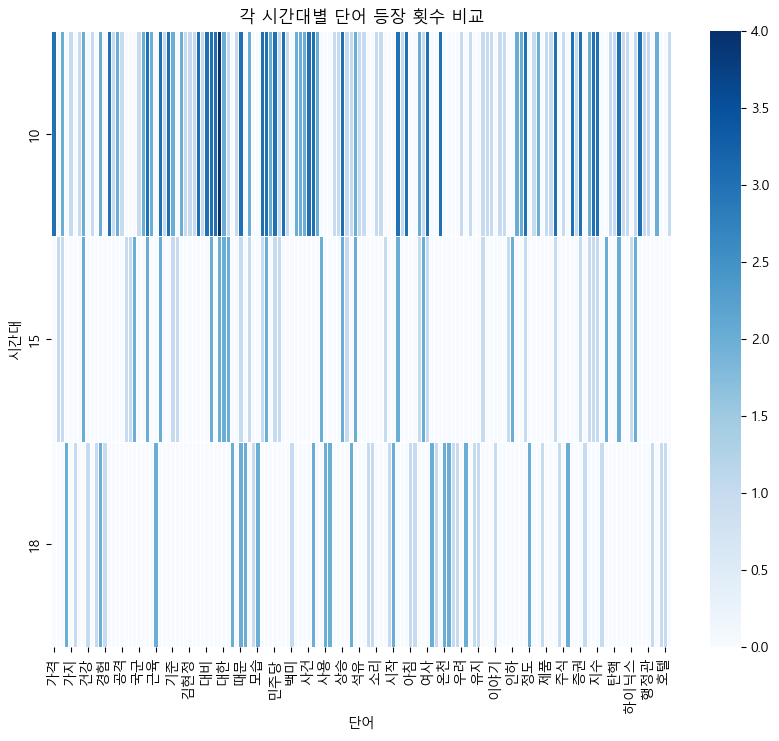

In [127]:
# 데이터프레임 확인 (필요한 데이터만 필터링)
df_words = df[['word', 'weight', 'created_at.2']]

# created_at을 datetime 형식으로 변환
df_words['created_at.2'] = pd.to_datetime(df_words['created_at.2'])

# 시간대(시간) 추출
df_words['hour'] = df_words['created_at.2'].dt.hour

# 각 시간대별로 단어 등장 횟수 집계
word_count_per_hour = df_words.groupby(['hour', 'word']).size().unstack(fill_value=0)

# 시각화 - 각 시간대별로 가장 자주 등장한 단어
plt.figure(figsize=(10, 8))
sns.heatmap(word_count_per_hour, cmap="Blues", linewidths=.5)
plt.title("각 시간대별 단어 등장 횟수 비교")
plt.xlabel("단어")
plt.ylabel("시간대")
plt.xticks(rotation=90)
plt.show()

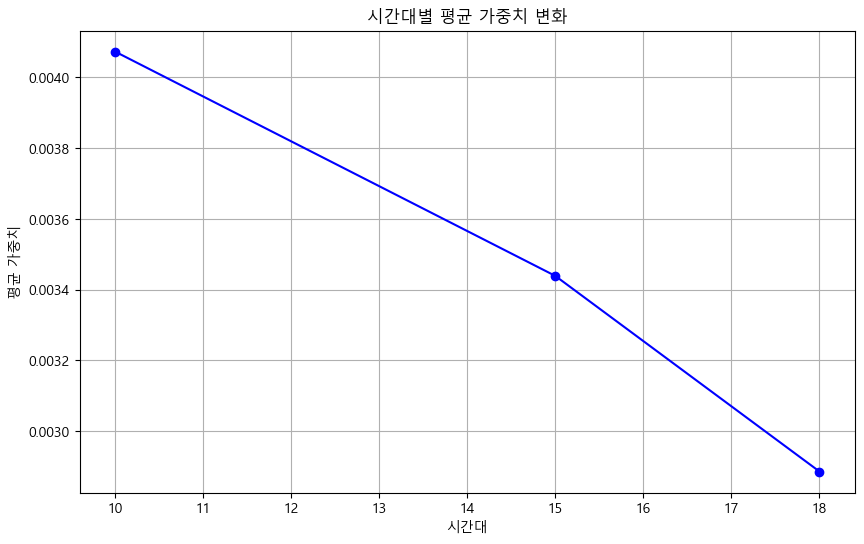

In [128]:
# 시간대별로 가중치 변화 분석
average_weight_per_hour = df_words.groupby(['hour'])['weight'].mean()

# 시각화 - 가중치 변화
plt.figure(figsize=(10, 6))
plt.plot(average_weight_per_hour.index, average_weight_per_hour.values, marker='o', linestyle='-', color='b')
plt.title("시간대별 평균 가중치 변화")
plt.xlabel("시간대")
plt.ylabel("평균 가중치")
plt.grid(True)
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\3658850036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_briefing['created_at'] = pd.to_datetime(df_briefing['created_at'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\3658850036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_briefing['content_length'] = df_briefing['content'].apply(len)


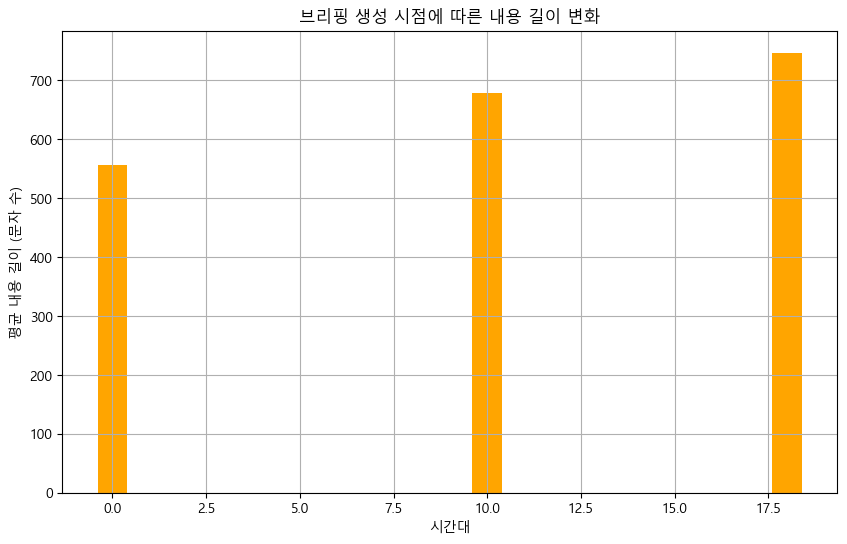

In [124]:
# 브리핑 생성 시점을 기준으로 내용 길이 분석
df_briefing = df[['created_at', 'content']]

# created_at을 datetime 형식으로 변환
df_briefing['created_at'] = pd.to_datetime(df_briefing['created_at'])

# content 길이 (문자 수) 계산
df_briefing['content_length'] = df_briefing['content'].apply(len)

# 시간대별 평균 content 길이 계산
average_content_length = df_briefing.groupby(df_briefing['created_at'].dt.hour)['content_length'].mean()

# 시각화 - 브리핑 생성 시점에 따른 내용 변화
plt.figure(figsize=(10, 6))
plt.bar(average_content_length.index, average_content_length.values, color='orange')
plt.title("브리핑 생성 시점에 따른 내용 길이 변화")
plt.xlabel("시간대")
plt.ylabel("평균 내용 길이 (문자 수)")
plt.grid(True)
plt.show()

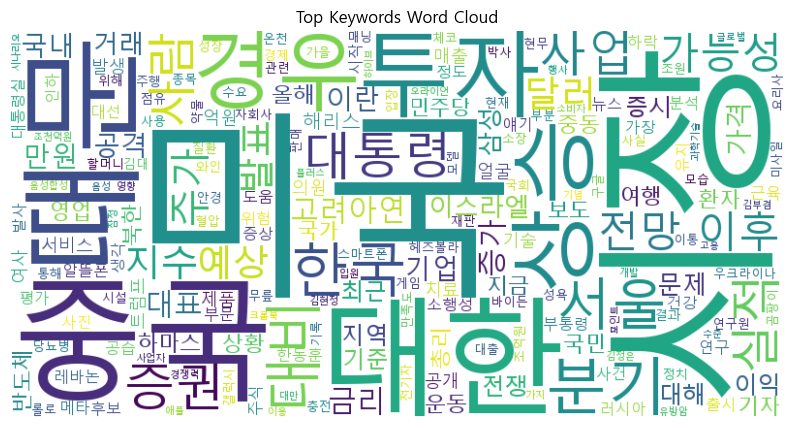

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 불러와서 데이터프레임으로 변환 (사용자 파일 경로를 지정하세요)
# file_path = 'select_topic.csv'  # 예시 경로
# df = pd.read_csv(file_path)

# 상위 키워드와 그 빈도 수를 추출
word_frequencies = df['word'].value_counts()

# WordCloud 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# WordCloud 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 제거하여 깔끔하게 표시
plt.title('Top Keywords Word Cloud')
plt.show()


In [144]:
data_file_path = './select_topic2.csv'

df = pd.read_csv(data_file_path)

print(df.head(5))

   brief_id            brief_created_at  user_id  \
0         1  2024-10-08 00:00:00.000000        1   
1         1  2024-10-08 00:00:00.000000        1   
2         1  2024-10-08 00:00:00.000000        1   
3         1  2024-10-08 00:00:00.000000        1   
4         1  2024-10-08 00:00:00.000000        1   

                          content_file_path  \
0  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
1  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
2  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
3  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
4  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   

                          summary_file_path  \
0  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
1  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
2  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
3  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   
4  af1e0903-31f6-4409-9d53-b9c5b74b9fa7.mp3   

                                             content  \
0  2024년 10월 7일 꿀모닝 브리핑을 시작합니다.안녕하세요. 어제 2일 서울 여의...   
1  2024년 

In [133]:
df.columns

Index(['brief_id', 'brief_created_at', 'user_id', 'content_file_path',
       'summary_file_path', 'content', 'summary', 'topic_model_id',
       'section_id', 'topic_model_created_at', 'topic_model_word_id', 'weight',
       'topic_model_word_created_at', 'word', 'word_created_at'],
      dtype='object')

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\1684963267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words['topic_model_created_at'] = pd.to_datetime(df_words['topic_model_created_at'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\1684963267.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words['hour'] = df_words['topic_model_created_at'].dt.hour


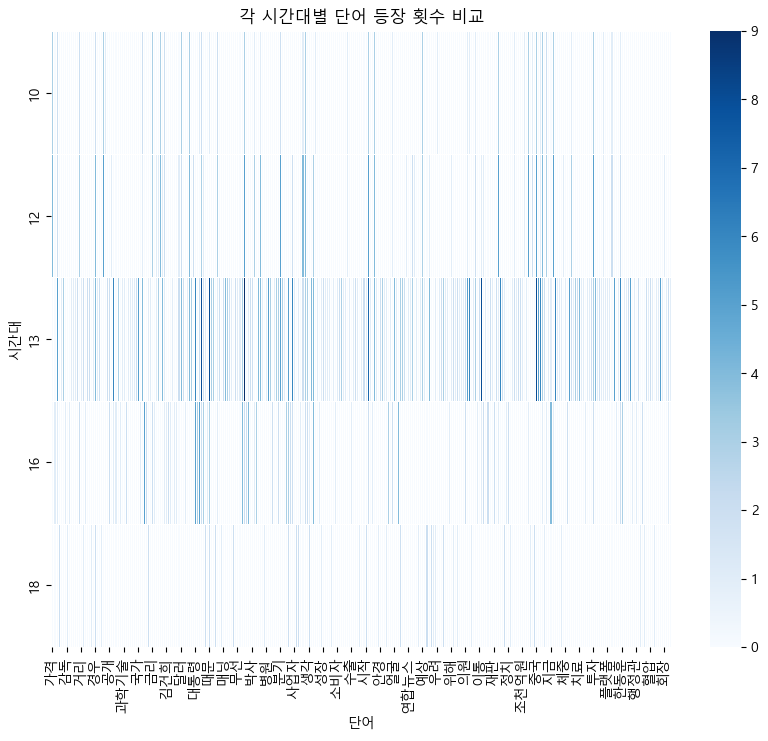

In [140]:
# 데이터프레임 확인 (필요한 데이터만 필터링)
df_words = df[['word', 'weight', 'topic_model_created_at']]

# created_at을 datetime 형식으로 변환
df_words['topic_model_created_at'] = pd.to_datetime(df_words['topic_model_created_at'])

# 시간대(시간) 추출
df_words['hour'] = df_words['topic_model_created_at'].dt.hour

# 각 시간대별로 단어 등장 횟수 집계
word_count_per_hour = df_words.groupby(['hour', 'word']).size().unstack(fill_value=0)

# 시각화 - 각 시간대별로 가장 자주 등장한 단어
plt.figure(figsize=(10, 8))
sns.heatmap(word_count_per_hour, cmap="Blues", linewidths=.5)
plt.title("각 시간대별 단어 등장 횟수 비교")
plt.xlabel("단어")
plt.ylabel("시간대")
plt.xticks(rotation=90)
plt.show()

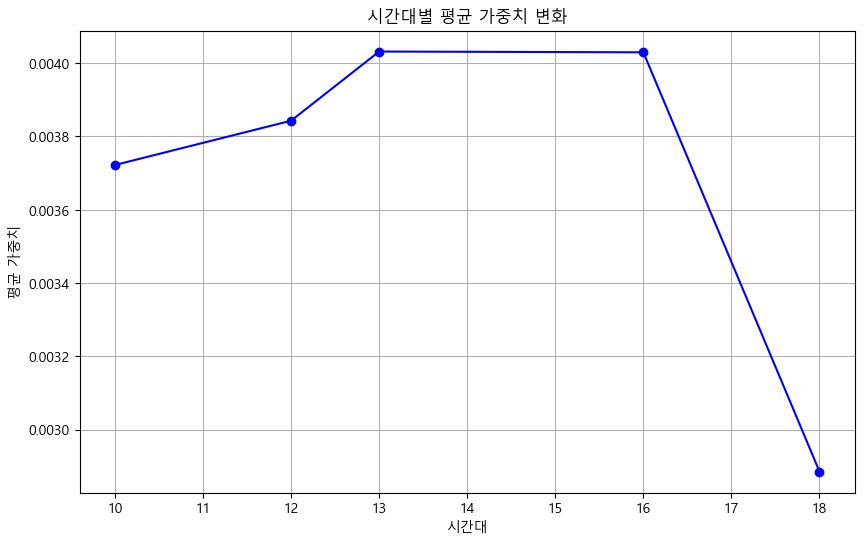

In [141]:
# 시간대별로 가중치 변화 분석
average_weight_per_hour = df_words.groupby(['hour'])['weight'].mean()

# 시각화 - 가중치 변화
plt.figure(figsize=(10, 6))
plt.plot(average_weight_per_hour.index, average_weight_per_hour.values, marker='o', linestyle='-', color='b')
plt.title("시간대별 평균 가중치 변화")
plt.xlabel("시간대")
plt.ylabel("평균 가중치")
plt.grid(True)
plt.show()


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\4001338106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_briefing['topic_model_created_at'] = pd.to_datetime(df_briefing['topic_model_created_at'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14492\4001338106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_briefing['content_length'] = df_briefing['content'].apply(len)


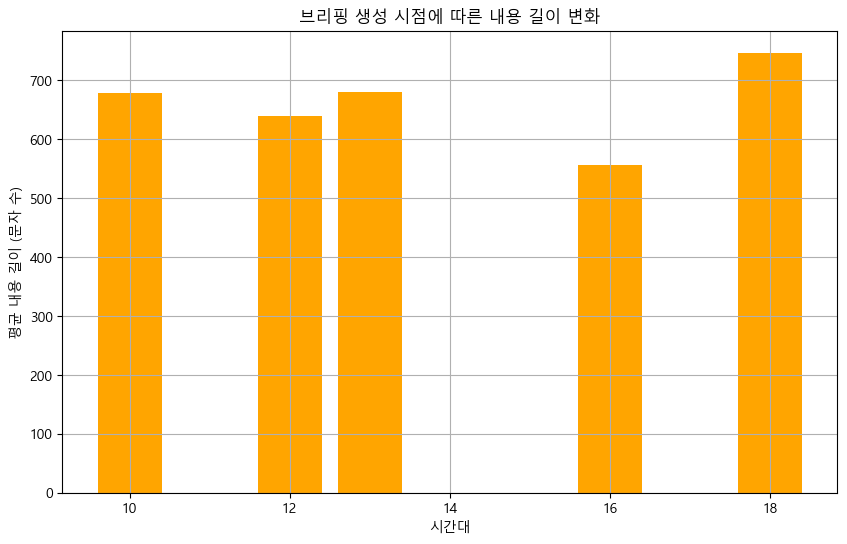

In [143]:
# 브리핑 생성 시점을 기준으로 내용 길이 분석
df_briefing = df[['topic_model_created_at', 'content']]

# created_at을 datetime 형식으로 변환
df_briefing['topic_model_created_at'] = pd.to_datetime(df_briefing['topic_model_created_at'])

# content 길이 (문자 수) 계산
df_briefing['content_length'] = df_briefing['content'].apply(len)

# 시간대별 평균 content 길이 계산
average_content_length = df_briefing.groupby(df_briefing['topic_model_created_at'].dt.hour)['content_length'].mean()

# 시각화 - 브리핑 생성 시점에 따른 내용 변화
plt.figure(figsize=(10, 6))
plt.bar(average_content_length.index, average_content_length.values, color='orange')
plt.title("브리핑 생성 시점에 따른 내용 길이 변화")
plt.xlabel("시간대")
plt.ylabel("평균 내용 길이 (문자 수)")
plt.grid(True)
plt.show()

In [145]:
# 날짜 컬럼을 datetime 형식으로 변환 (브리핑이 생성된 날짜를 기준으로)
df['brief_created_at'] = pd.to_datetime(df['brief_created_at'])

# 토픽 모델이 생성된 날짜도 datetime 형식으로 변환
df['topic_model_created_at'] = pd.to_datetime(df['topic_model_created_at'])

# 일자별로 토픽과 연관된 단어들을 그룹화하여 요약
grouped_topics = df.groupby(['brief_created_at', 'topic_model_id']).agg({
    'word': lambda x: ', '.join(x),  # 해당 날짜의 토픽 관련 단어들을 하나로 연결
    'weight': 'sum'  # 각 단어의 가중치를 합산하여 계산
}).reset_index()

# 일자별 토픽 내용을 출력
print(grouped_topics)

# 필요시 데이터 시각적으로 확인
import ace_tools as tools; tools.display_dataframe_to_user(name="Grouped Topics by Date", dataframe=grouped_topics)

             brief_created_at  topic_model_id  \
0  2024-10-07 18:12:00.388340               6   
1  2024-10-07 18:12:00.388340               7   
2  2024-10-08 00:00:00.000000               1   
3  2024-10-08 00:00:00.000000               2   
4  2024-10-08 00:00:00.000000               3   
5  2024-10-08 00:00:00.000000               4   
6  2024-10-08 00:00:00.000000               5   
7  2024-10-08 10:45:09.634520               8   
8  2024-10-08 10:45:09.634520               9   
9  2024-10-08 10:45:09.634520              10   
10 2024-10-08 12:54:45.140865              11   
11 2024-10-08 12:54:45.140865              12   
12 2024-10-08 12:54:45.140865              13   
13 2024-10-08 12:54:45.140865              14   
14 2024-10-08 12:54:45.140865              15   
15 2024-10-08 13:02:10.476245              16   
16 2024-10-08 13:02:10.476245              17   
17 2024-10-08 13:02:10.476245              18   
18 2024-10-08 13:02:10.476245              19   
19 2024-10-08 13:16:

ModuleNotFoundError: No module named 'ace_tools'